### import Libries

In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Step 2: Load the MNIST Dataset

In [33]:
# load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### Step 3 :Normalize the data

In [34]:
# normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0
print("Data normalized successfully.")

Data normalized successfully.


### step 4: Build the CNN model

In [45]:
model = models.Sequential()          # Create a sequencial CNN model

model.add(layers.Conv2D(64, (5, 5), activation='tanh', input_shape=(28, 28, 1)))          # First convolutional layer + max pooling
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (5, 5), activation='tanh'))          # Second convolutional layer + max pooling
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='tanh'))          # Third convolutional layer

model.add(layers.Flatten())          # Flatten and dense layers
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(10))

print("CNN model built successfully.")

CNN model built successfully.


### Step 6: Loop through and print each layer's details

In [46]:
print("\n=== LAYER DETAILS ===")
for i, layer in enumerate(model.layers):
  print(f"Layer {i+1}: {layer.name}")
  print(f" Type: {layer.__class__.__name__}")
  try:
    print(f" Output Shape: {layer.output_shape}")
  except AttributeError:
    print(" Output Shape: N/A")
  print(f" Number of Parameters: {layer.count_params()}")
  print("_" * 40)


=== LAYER DETAILS ===
Layer 1: conv2d_66
 Type: Conv2D
 Output Shape: N/A
 Number of Parameters: 1664
________________________________________
Layer 2: max_pooling2d_44
 Type: MaxPooling2D
 Output Shape: N/A
 Number of Parameters: 0
________________________________________
Layer 3: conv2d_67
 Type: Conv2D
 Output Shape: N/A
 Number of Parameters: 204928
________________________________________
Layer 4: max_pooling2d_45
 Type: MaxPooling2D
 Output Shape: N/A
 Number of Parameters: 0
________________________________________
Layer 5: conv2d_68
 Type: Conv2D
 Output Shape: N/A
 Number of Parameters: 73792
________________________________________
Layer 6: flatten_21
 Type: Flatten
 Output Shape: N/A
 Number of Parameters: 0
________________________________________
Layer 7: dense_42
 Type: Dense
 Output Shape: N/A
 Number of Parameters: 32896
________________________________________
Layer 8: dense_43
 Type: Dense
 Output Shape: N/A
 Number of Parameters: 1290
_______________________________

### model train and test accuracy

In [47]:
# Compile and train the model using Adam optimizer (5 epochs)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 232s 122ms/step - accuracy: 0.9284 - loss: 0.2366 - val_accuracy: 0.9808 - val_loss: 0.0601
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 261s 122ms/step - accuracy: 0.9824 - loss: 0.0572 - val_accuracy: 0.9819 - val_loss: 0.0544
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 267s 125ms/step - accuracy: 0.9886 - loss: 0.0372 - val_accuracy: 0.9844 - val_loss: 0.0508
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 236s 126ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9883 - val_loss: 0.0384
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 124ms/step - accuracy: 0.9913 - loss: 0.0275 - val_accuracy: 0.9885 - val_loss: 0.0369


In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 9s - 30ms/step - accuracy: 0.9885 - loss: 0.0369

Test accuracy: 0.9884999990463257


### visualization

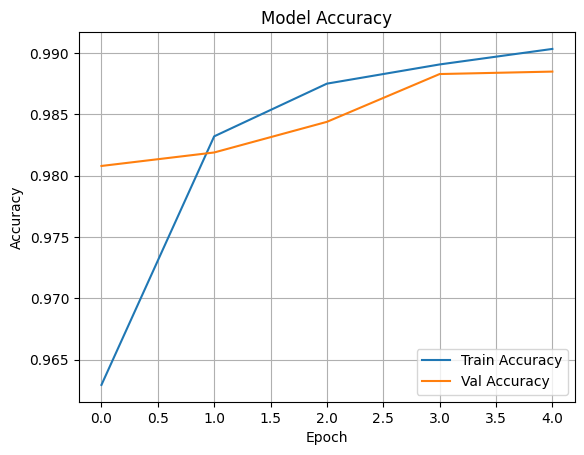

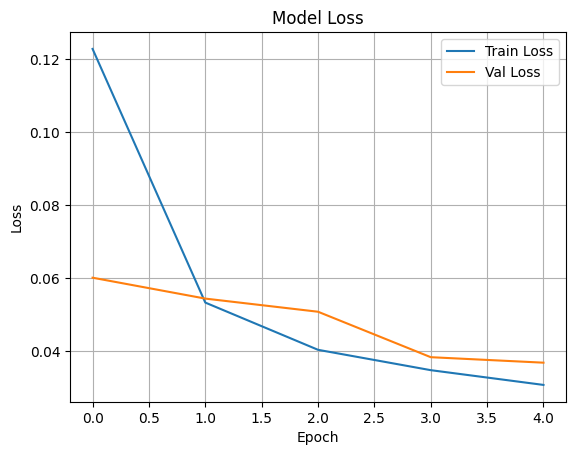

In [49]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [50]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 24, 24, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 2, 2, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 943,712 (3.60 MB)

 Trainable params: 314,570 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 629,142 (2.40 MB)